In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-games-sale/video games sales.csv


In [2]:
df = pd.read_csv("/kaggle/input/video-games-sale/video games sales.csv")
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.describe().sum()

Rank            71192.959187
Year            28359.235424
NA_Sales        16640.891350
EU_Sales        16627.802003
JP_Sales        16608.647072
Other_Sales     16608.856651
Global_Sales    16683.542469
dtype: float64

In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
fig = px.scatter(df, x="NA_Sales", y="EU_Sales", title="Comparaison entre les ventes en europe et l'amérique de nord", trendline="ols")
fig.show()

Relationships between Genre and Global_Sales

In [9]:
fig = px.box(df, x='Genre', 
             y='Global_Sales',
             title='Historical Genre and Global_Sales')
fig.show()

create corrlation matrix

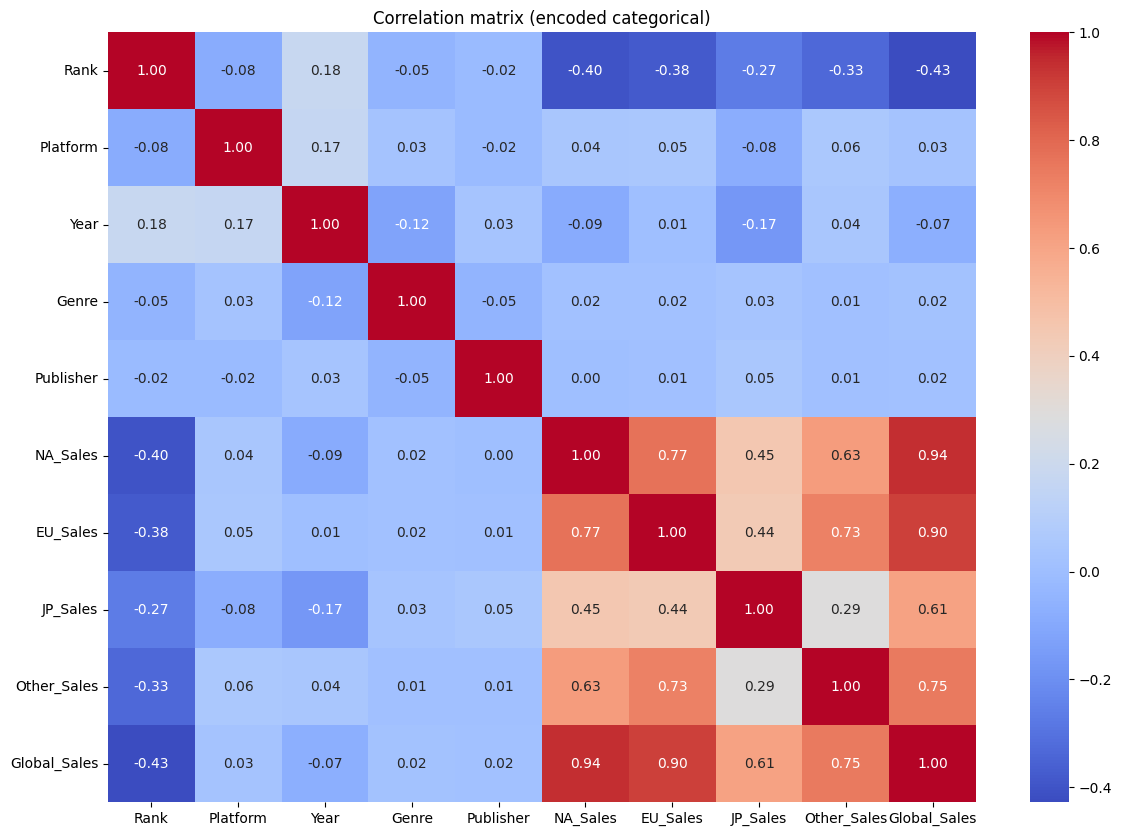

In [10]:

from sklearn.preprocessing import LabelEncoder


# Copy original df
df_encoded = df.copy()

# categorical column to encoded
cat_cols = ['Platform', 'Genre', 'Publisher']

# categorical column encoded
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# remove non numerical column
columns_to_drop = ['Name']  # Ajoute 'Rank' ici si tu ne veux pas l'analyser
df_encoded = df_encoded.drop(columns=columns_to_drop)

# calculate correlation matrix
corr_matrix = df_encoded.corr()

# Affichage du heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix (encoded categorical)")
plt.show()


Which variables have the greatest influence on Global_Sales?
Once the columns have been coded, we can sort the correlation matrix by Global_Sales:

In [11]:
# Display the correlation with Global_Sales
corr_with_global_sales = corr_matrix['Global_Sales'].sort_values(ascending=False)
print("Correlation with Global_Sales :\n")
print(corr_with_global_sales)

Correlation with Global_Sales :

Global_Sales    1.000000
NA_Sales        0.941047
EU_Sales        0.902836
Other_Sales     0.748331
JP_Sales        0.611816
Platform        0.028213
Genre           0.021671
Publisher       0.015869
Year           -0.074735
Rank           -0.427407
Name: Global_Sales, dtype: float64


Sales by region (NA, EU, Other) are highly correlated with Global_Sales (which makes sense).
Other variables such as Platform or Genre have a much weaker influence.

Analysis 2: Correlation between Genre and Sales
Gender is coded as a number. Average sales figures for each genre can be seen:

In [12]:
# Average sales comparison by genre
df_grouped_by_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean().sort_values(by='Global_Sales', ascending=False)
print(df_grouped_by_genre)


              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Platform      0.504571  0.227573  0.147596     0.058228      0.938341
Shooter       0.444733  0.239137  0.029221     0.078389      0.791885
Role-Playing  0.219946  0.126384  0.236767     0.040060      0.623233
Racing        0.287766  0.190865  0.045388     0.061865      0.586101
Sports        0.291283  0.160635  0.057702     0.057532      0.567319
Fighting      0.263667  0.119481  0.103007     0.043255      0.529375
Action        0.264726  0.158323  0.048236     0.056508      0.528100
Misc          0.235906  0.124198  0.061967     0.043312      0.465762
Simulation    0.211430  0.130773  0.073472     0.036355      0.452364
Puzzle        0.212680  0.087251  0.098471     0.021564      0.420876
Strategy      0.100881  0.066579  0.072628     0.016681      0.257151
Adventure     0.082271  0.049868  0.040490     0.013072      0.185879


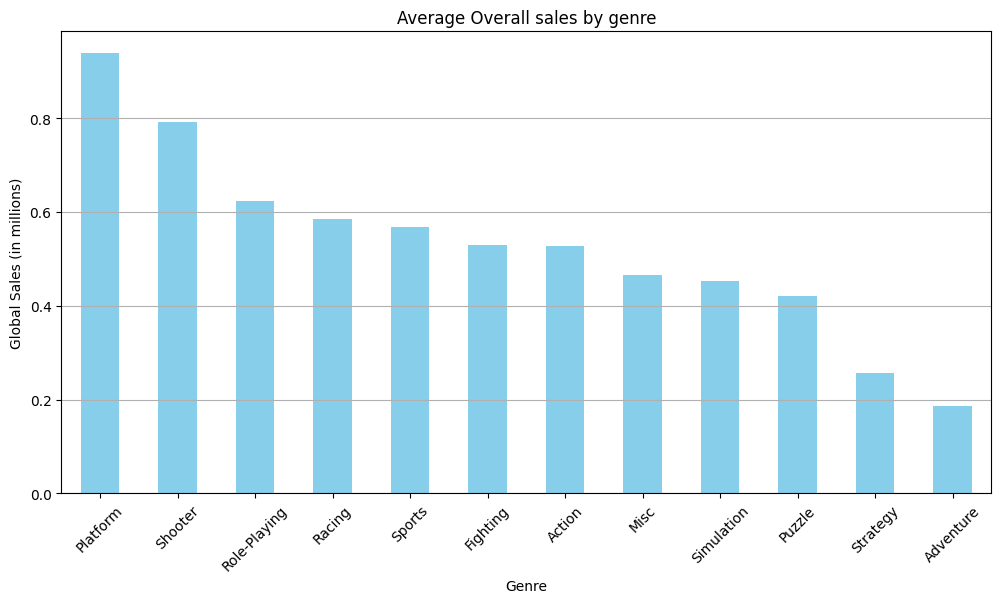

In [13]:
# Viewing average sales by genre
df_grouped_by_genre['Global_Sales'].plot(kind='bar', figsize=(12, 6), title='Average Overall sales by genre', color='skyblue')
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [14]:
fig = px.bar(df_grouped_by_genre,
             x=df_grouped_by_genre.index,
             y='Global_Sales',
             title='Average Overall Sales by Genre (interactive)',
             labels={'Global_Sales':'Global Sales (millions)', 'Genre':'Genre'})
fig.show()

Which publishers sell the most?
We'll group the data by publisher and calculate the average or sum of overall sales.

In [15]:
# Sales average by publisher
df_grouped_by_publisher = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False)
#Top 5
print(df_grouped_by_publisher.head(5))

Publisher
Palcom                 4.170000
Red Orb                2.620000
Nintendo               2.541337
Arena Entertainment    2.360000
UEP Systems            2.250000
Name: Global_Sales, dtype: float64


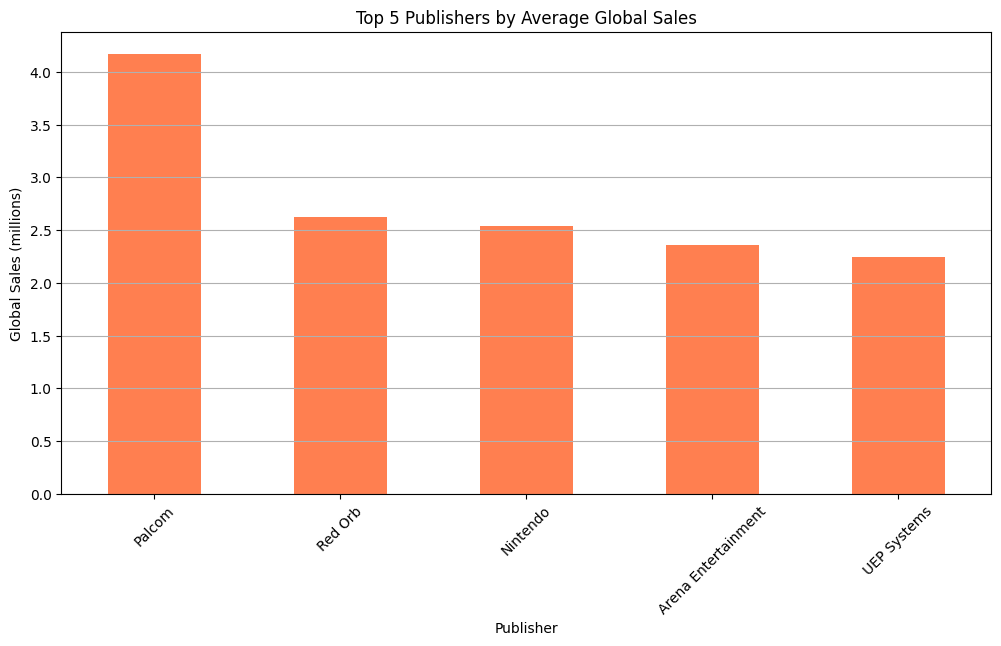

In [16]:
df_grouped_by_publisher.head(5).plot(kind='bar', figsize=(12,6), color='coral')
plt.title('Top 5 Publishers by Average Global Sales')
plt.ylabel('Global Sales (millions)')
plt.xlabel('Publisher')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Which platforms sell the most? Same principle, but this time with the Platform column.

In [17]:
# Sales Average by Platform
df_grouped_by_platform = df.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False)
print(df_grouped_by_platform.head(5))

Platform
GB      2.606633
NES     2.561939
GEN     1.050370
SNES    0.837029
PS4     0.827679
Name: Global_Sales, dtype: float64


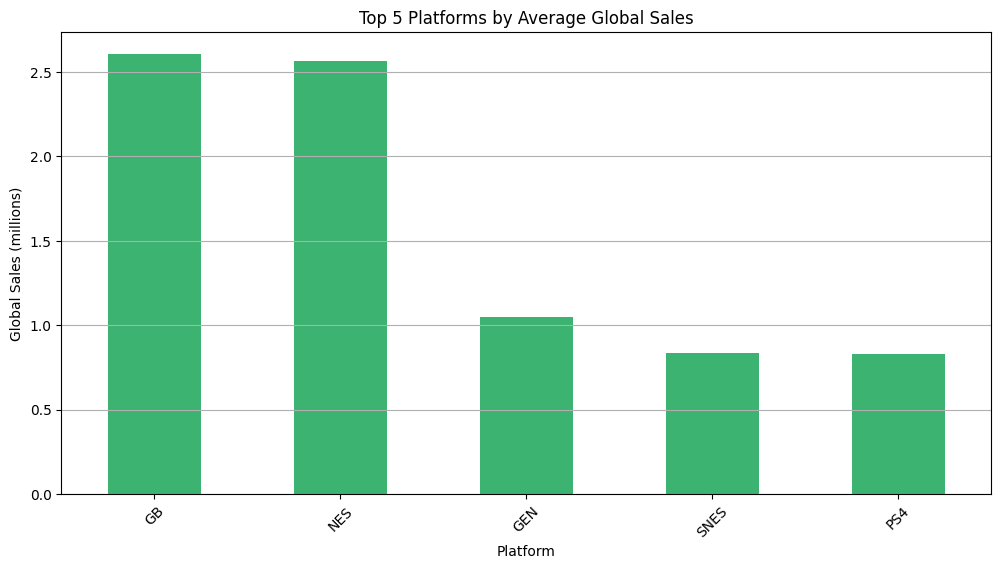

In [18]:
df_grouped_by_platform.head(5).plot(kind='bar', figsize=(12,6), color='mediumseagreen')
plt.title('Top 5 Platforms by Average Global Sales')
plt.ylabel('Global Sales (millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Distribution of overall sales by year of release

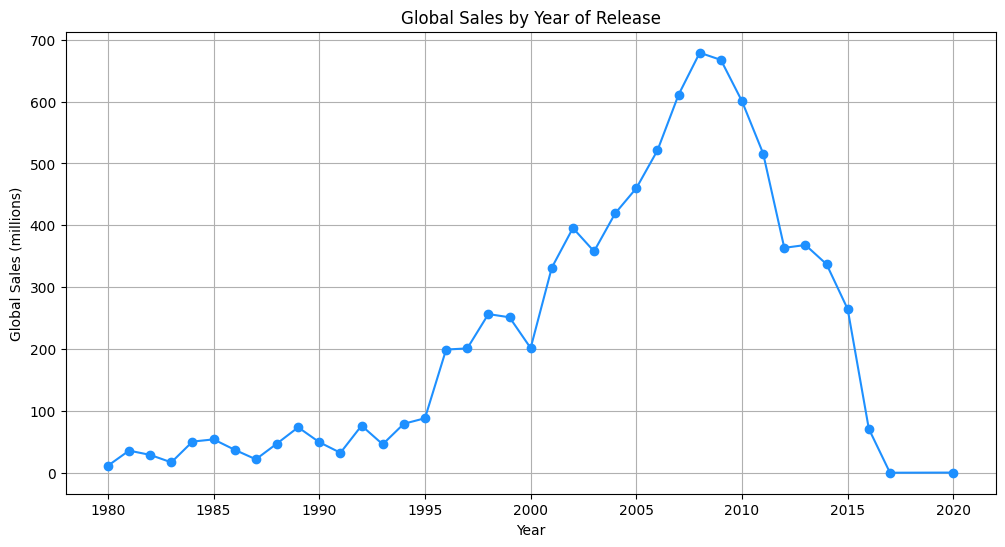

In [19]:
# We visualize the trend over time
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert properly
sales_per_year = df.groupby('Year')['Global_Sales'].sum()

sales_per_year.plot(kind='line', figsize=(12,6), marker='o', color='dodgerblue')
plt.title("Global Sales by Year of Release")
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.grid()
plt.show()

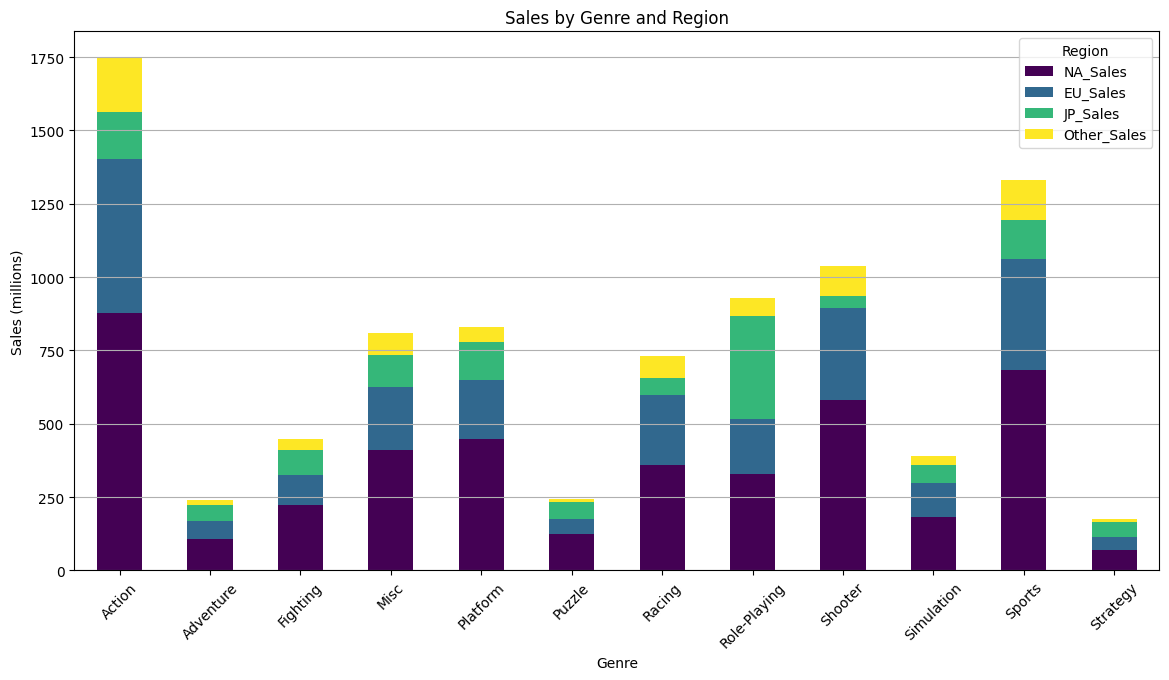

In [20]:
# Sales by Genre (stacked bar across multiple regions)
genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

genre_sales.plot(kind='bar', stacked=True, figsize=(14,7), colormap='viridis')
plt.title("Sales by Genre and Region")
plt.ylabel("Sales (millions)")
plt.xticks(rotation=45)
plt.legend(title="Region")
plt.grid(axis='y')
plt.show()


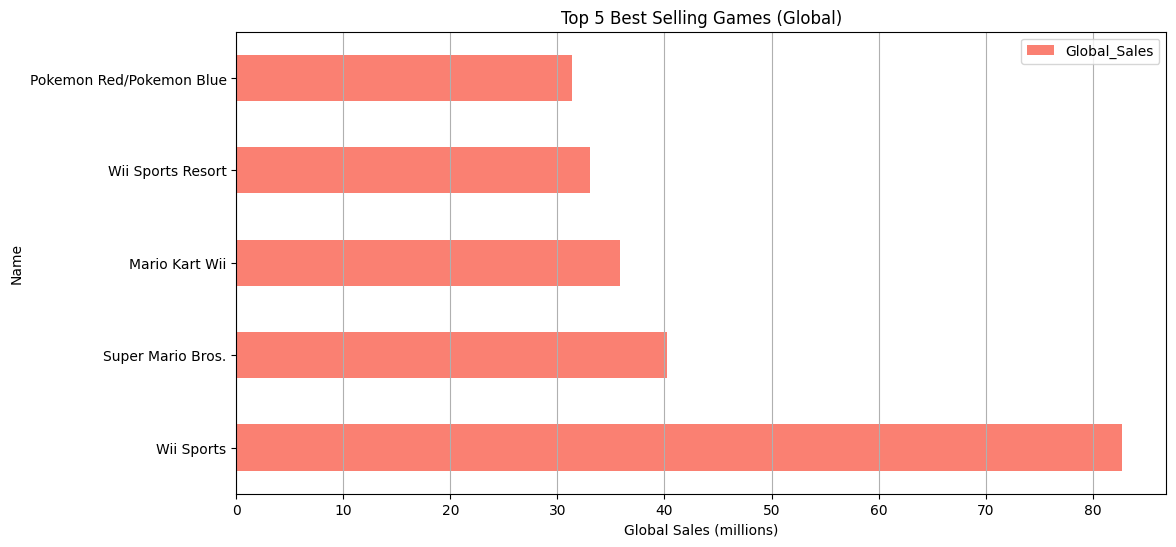

In [21]:
# Top 5 Best-Selling Games Globally
top_games = df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(5)

top_games.plot(x='Name', y='Global_Sales', kind='barh', figsize=(12,6), color='salmon')
plt.title("Top 5 Best Selling Games (Global)")
plt.xlabel("Global Sales (millions)")
plt.gca()
plt.grid(axis='x')
plt.show()

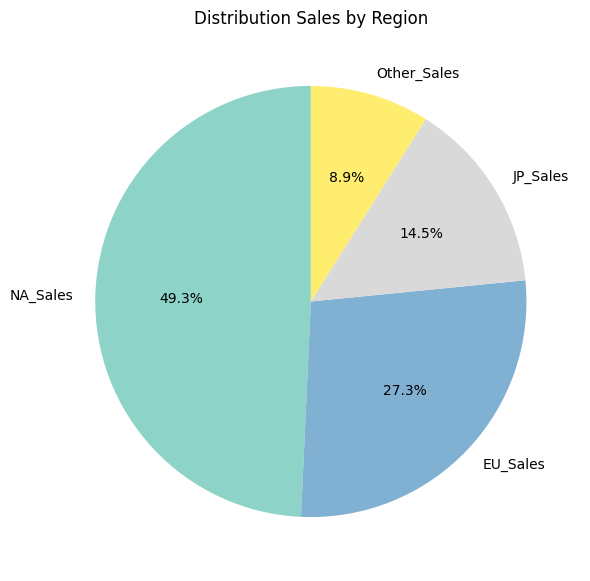

In [22]:
# Market share map by region
region_totals = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

region_totals.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), startangle=90, colormap='Set3')
plt.title("Distribution Sales by Region")
plt.ylabel('')
plt.show()

This pie chart indicates the sales distribution in different regions for a particular dataset. The regions displayed are North America (NA), Japan (JP), and European Union (EU).

Key Points:

North America (NA_Sales):

Percentage: 49.3%
Observation: This region boasts the largest share of sales, which suggests that it is the most significant market for the product.
European Union (EU_Sales):

Percentage: 27.3
Observation: This EU is extensive but has a lesser percentage compared to North America and demonstrates considerable market presence.
Japan (JP_Sales):

Percentage: 8.9%
Observation: This market share is lowest and could represent penetration problems in the market or other differences in consumer preferences.
Null Region:

Percentage: 14.5%
Observation: This group can represent unreported or unallocated sales, indicating gaps in data or a requirement for further analysis.
Conclusion

The fact that North America is leading the field in terms of overall sales makes it the central focus to prioritize for marketing and investment strategy.
Poor performance in Japan may mean there is room for market study or specialized action to drive increased sales within it.
Monitoring of the percentage of unknown sales can enable subsequent attempts to acquire total data to build more in-depth analytics.
In general, the pie chart is a valuable tool for learning regional sales distribution and guiding strategic decisions.






In [23]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Feature Selection
features = ['Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
target = 'Global_Sales'

# Encoding of categorical variables
df_model = df.copy()
for col in ['Platform', 'Genre', 'Publisher']:
    df_model[col] = LabelEncoder().fit_transform(df_model[col].astype(str))

# Separation X / y
X = df_model[features]
y = df_model[target]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# creation keras model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=30, validation_split=0.2)
# assessment
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on test : {mae:.2f}")


2025-04-10 23:38:03.830660: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744328284.102085      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744328284.173054      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

2025-04-10 23:38:21.365580: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR 

Epoch 1/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4993 - mae: 0.2381 - val_loss: 0.0051 - val_mae: 0.0422
Epoch 2/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046 - mae: 0.0372 - val_loss: 0.0030 - val_mae: 0.0293
Epoch 3/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0030 - mae: 0.0281 - val_loss: 0.0023 - val_mae: 0.0233
Epoch 4/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015 - mae: 0.0221 - val_loss: 0.0017 - val_mae: 0.0233
Epoch 5/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.4339e-04 - mae: 0.0190 - val_loss: 0.0017 - val_mae: 0.0255
Epoch 6/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1013e-04 - mae: 0.0185 - val_loss: 0.0011 - val_mae: 0.0173
Epoch 7/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013 - mae: 0.0203 - val_loss: 0.0014 - val_mae: 0.0188
Epoch 8/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017 - mae: 0.0216 - val_loss: 0.0021 - val_mae: 0.0188
Epoch 9/30
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/s